# Import Required Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
from google.colab import drive

# Mount Google Drive and Specify Dataset Directory

In [2]:
from google.colab import drive
drive.mount('/content/drive')

train_dir = '/content/drive/My Drive/Dataset/Dataset Fish Species/Types of fish/FishImgDataset/train'
validation_dir = '/content/drive/My Drive/Dataset/Dataset Fish Species/Types of fish/FishImgDataset/val'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Preprocessing Data

## Create Image Data Generator

In [3]:
# Image Data Generator
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 8801 images belonging to 31 classes.
Found 2751 images belonging to 31 classes.


# Build CNN Model

In [4]:
# Build CNN Model
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(150, 150, 3)),
    LeakyReLU(alpha=0.1),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3)),
    LeakyReLU(alpha=0.1),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128),
    LeakyReLU(alpha=0.1),

    Dense(train_generator.num_classes, activation='sigmoid')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


# Add Callback for Early Stopping

In [5]:
# Callback untuk early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the Model

In [6]:
# Train the Model
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


276/276 ━━━━━━━━━━━━━━━━━━━━ 8128s 29s/step - accuracy: 0.2258 - loss: 3.1226 - val_accuracy: 0.5133 - val_loss: 1.8354
Epoch 2/15
276/276 ━━━━━━━━━━━━━━━━━━━━ 562s 2s/step - accuracy: 0.5927 - loss: 1.4891 - val_accuracy: 0.8088 - val_loss: 0.7496
Epoch 3/15
276/276 ━━━━━━━━━━━━━━━━━━━━ 557s 2s/step - accuracy: 0.8661 - loss: 0.5047 - val_accuracy: 0.9175 - val_loss: 0.3578
Epoch 4/15
276/276 ━━━━━━━━━━━━━━━━━━━━ 591s 2s/step - accuracy: 0.9656 - loss: 0.1495 - val_accuracy: 0.9498 - val_loss: 0.2753
Epoch 5/15
276/276 ━━━━━━━━━━━━━━━━━━━━ 538s 2s/step - accuracy: 0.9871 - loss: 0.0613 - val_accuracy: 0.9506 - val_loss: 0.2896
Epoch 6/15
276/276 ━━━━━━━━━━━━━━━━━━━━ 559s 2s/step - accuracy: 0.9873 - loss: 0.0620 - val_accuracy: 0.9346 - val_loss: 0.3598
Epoch 7/15
276/276 ━━━━━━━━━━━━━━━━━━━━ 506s 2s/step - accuracy: 0.9904 - loss: 0.0447 - val_accuracy: 0.9538 - val_loss: 0.2996
Epoch 8/15
276/276 ━━━━━━━━━━━━━━━━━━━━ 563s 2s/step - accuracy: 0.9968 - loss: 0.0181 - val_accuracy: 0.9

# Evaluate the Model

In [7]:
# Evaluasi Model
train_loss, train_accuracy = model.evaluate(train_generator)
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

276/276 ━━━━━━━━━━━━━━━━━━━━ 180s 652ms/step - accuracy: 0.9906 - loss: 0.0510
86/86 ━━━━━━━━━━━━━━━━━━━━ 51s 592ms/step - accuracy: 0.9522 - loss: 0.2930
Training Accuracy: 99.07%
Validation Accuracy: 94.98%


# Create Visualization of Model Results

## Plot Learning Curve

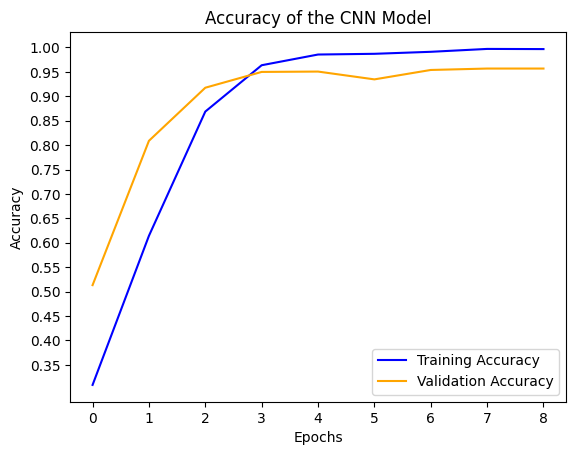

In [8]:
# Plot history
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Accuracy of the CNN Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Customize y-axis ticks
plt.yticks(np.arange(0.35, 1.05, 0.05))  # From 0.35 to 1.00 with steps of 0.05

plt.show()

## Plot Loss Curve

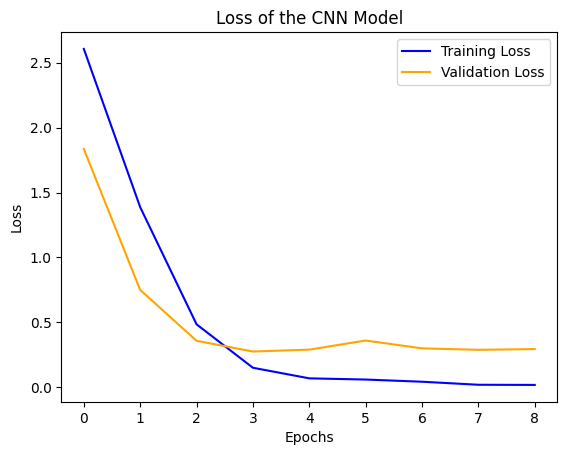

In [9]:
# Plot Loss Curve
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss of the CNN Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Testing new data on the CNN model

## Import Libraries

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import numpy as np
import seaborn as sns


## Define Data Path and Prepare Image Data Generator

In [11]:
# Define Data Path for New Data
new_data_dir = '/content/drive/My Drive/Dataset/Dataset Fish Species/Types of fish/FishImgDataset/test'

# Prepare Image Data Generator for New Data
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow_from_directory(
    new_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 1760 images belonging to 31 classes.


## Evaluate the Model on New Testing Data

In [12]:
# Evaluate the Model on New Data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss on new test data: {test_loss}')
print(f'Test Accuracy on new test data: {test_accuracy * 100:.2f}%')


55/55 ━━━━━━━━━━━━━━━━━━━━ 1178s 22s/step - accuracy: 0.9018 - loss: 0.4964
Test Loss on new test data: 0.5223585963249207
Test Accuracy on new test data: 90.57%


## Predict on New Testing Data

In [13]:
# Predict on New Data
test_generator.reset()
Y_pred = model.predict(test_generator, test_generator.samples // test_generator.batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes


55/55 ━━━━━━━━━━━━━━━━━━━━ 36s 644ms/step


## Classification Report on New Testing Data

In [14]:
# Evaluate and Print Results
# Classification Report
class_labels = list(test_generator.class_indices.keys())
print('\nClassification Report for testing new data with the CNN model')
print(classification_report(y_true, y_pred, target_names=class_labels))



Classification Report for testing new data with the CNN model
                       precision    recall  f1-score   support

               Bangus       0.91      0.91      0.91        34
        Big Head Carp       0.92      0.77      0.84        43
   Black Spotted Barb       0.94      0.85      0.89        40
              Catfish       0.79      0.97      0.87        62
       Climbing Perch       1.00      0.77      0.87        30
 Fourfinger Threadfin       0.89      0.89      0.89        38
       Freshwater Eel       0.93      0.91      0.92        55
       Glass Perchlet       0.85      0.94      0.89        77
                 Goby       0.92      0.91      0.91       124
            Gold Fish       0.98      0.98      0.98        41
              Gourami       0.93      0.98      0.95        63
           Grass Carp       0.93      0.95      0.94       238
 Green Spotted Puffer       0.82      0.82      0.82        22
          Indian Carp       0.92      0.89      0.90  

## Creating visualization of the confusion matrix on new testing data

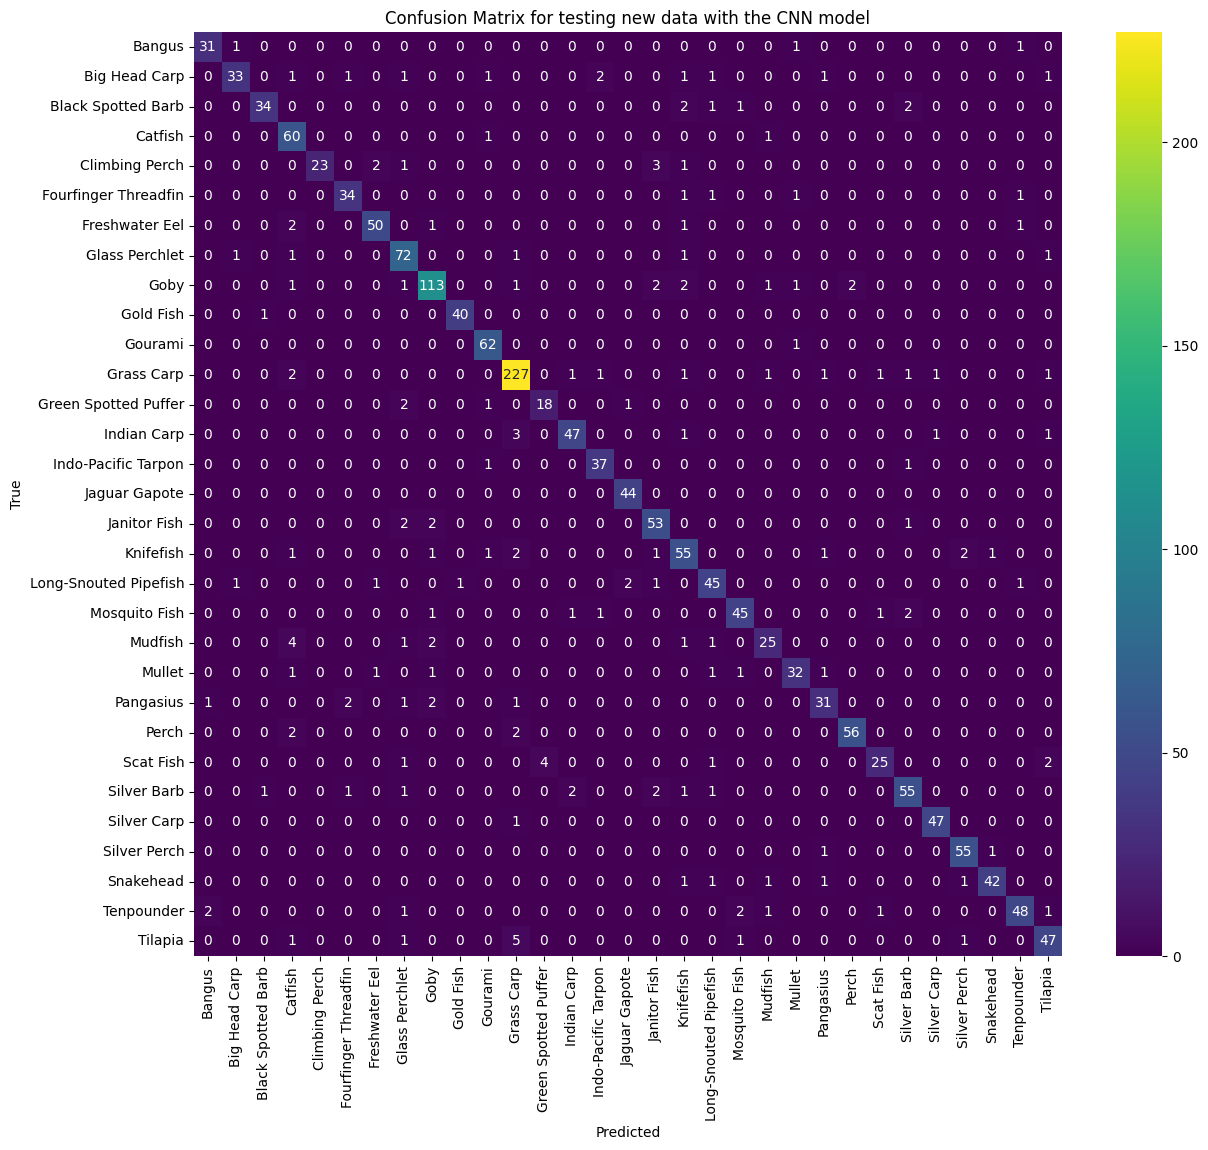

In [15]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(14, 12))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap="viridis")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for testing new data with the CNN model')
plt.show()


## Creating visualization of AUC-ROC Curves on new testing data


AUC-ROC on new test data: 0.97


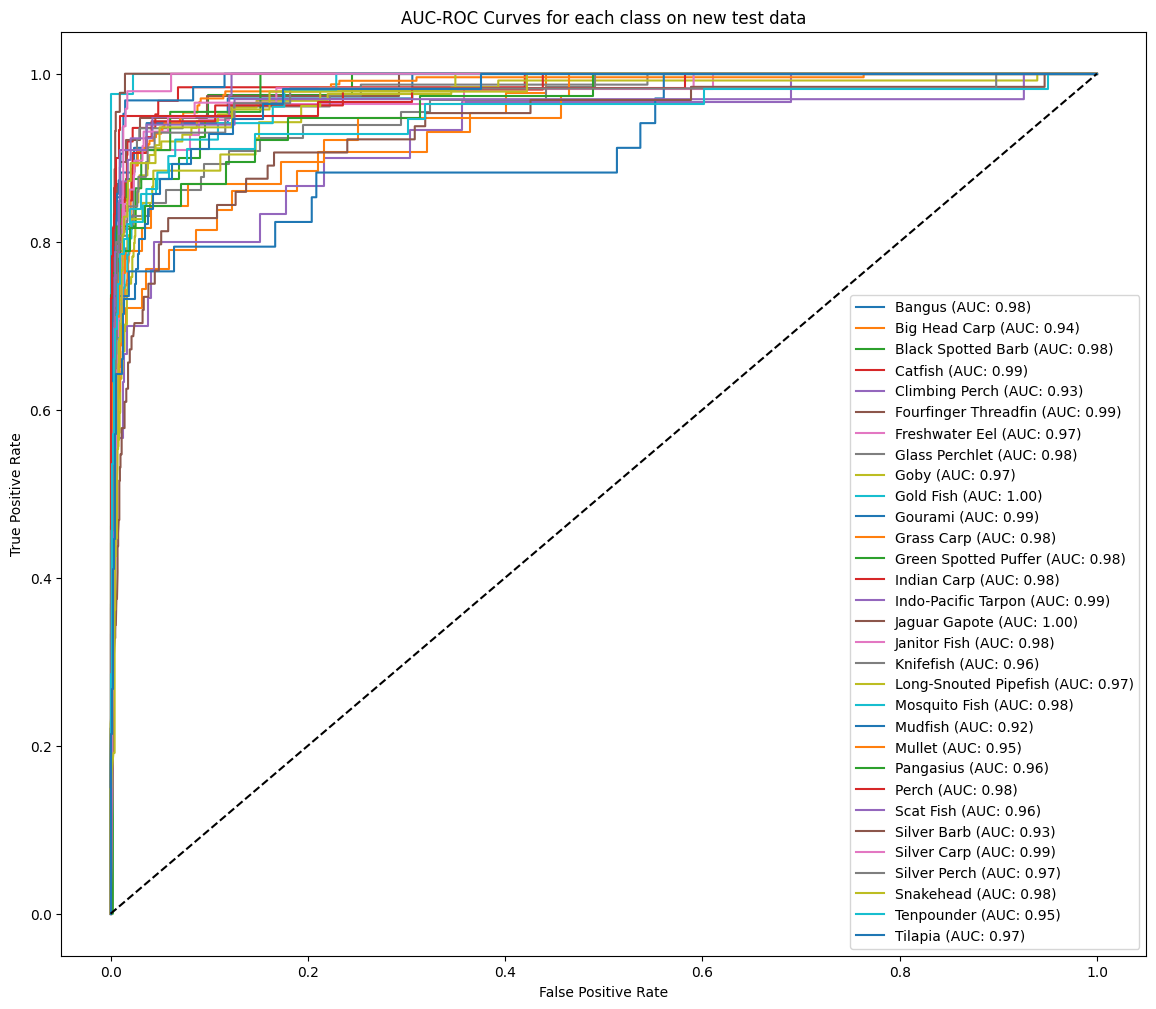

In [16]:
# Binarize the labels for AUC-ROC
y_true_binarized = label_binarize(y_true, classes=np.arange(len(class_labels)))

# Compute the AUC-ROC for each class
roc_auc = roc_auc_score(y_true_binarized, Y_pred, average='macro')
print(f'\nAUC-ROC on new test data: {roc_auc:.2f}')

# Plotting AUC-ROC curves for each class
plt.figure(figsize=(14, 12))
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(y_true_binarized[:, i], Y_pred[:, i])
    plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC: {roc_auc_score(y_true_binarized[:, i], Y_pred[:, i]):.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curves for each class on new test data')
plt.legend(loc='best')
plt.show()

# Save Model Machine Learning

In [ ]:
# Save the model
model_path = '/content/drive/My Drive/classification_of_fish_species_model.h5'
model.save(model_path)

# Convert Keras Model to TensorFlow.js

In [54]:
import tensorflowjs as tfjs
from tensorflow.keras.models import load_model
import os

# Load Keras model
model_path = '/content/drive/My Drive/classification_of_fish_species_model.h5'
model = load_model(model_path)

# Save as TensorFlow.js model
output_dir = '/content/drive/My Drive/tfjs_model'
tfjs.converters.save_keras_model(model, output_dir)

# Verify Conversion Result
if os.path.isdir(output_dir):
    files = os.listdir(output_dir)
    if files:
        print("Conversion successful. Files in the tfjs_model folder:", files)
    else:
        print("The tfjs_model folder is empty, conversion might have failed.")
else:
    print("The tfjs_model folder was not found.")


failed to lookup keras version from the file,
    this is likely a weight only file
Konversi berhasil. File di folder tfjs_model: ['group1-shard1of11.bin', 'group1-shard2of11.bin', 'group1-shard3of11.bin', 'group1-shard4of11.bin', 'group1-shard5of11.bin', 'group1-shard6of11.bin', 'group1-shard7of11.bin', 'group1-shard8of11.bin', 'group1-shard9of11.bin', 'group1-shard10of11.bin', 'group1-shard11of11.bin', 'model.json']


# Machine Learning Model Simulation for Fish Type Classification

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from google.colab import files
from IPython.display import display, Image
import numpy as np

In [ ]:
# Function to load and preprocess image
def load_and_preprocess_image(image_path, target_size=(150, 150)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize
    return img_array

# Function to predict fish type
def predict_fish_type(model, image_path, class_labels):
    img_array = load_and_preprocess_image(image_path)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)
    fish_name = class_labels[predicted_class[0]]
    return fish_name

# Load the trained model
model_path = '/content/drive/My Drive/classification_of_fish_species.h5'
model = load_model(model_path)

Saving istockphoto-1204552660-612x612.jpg to istockphoto-1204552660-612x612 (1).jpg


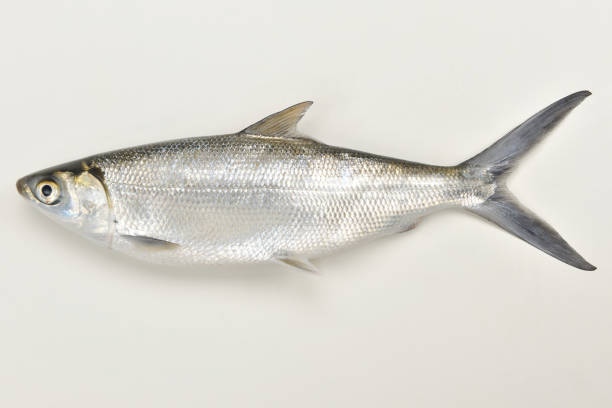

1/1 [==============================] - 0s 59ms/step
The classification of that type of fish is: Bangus


In [ ]:
# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Function to input image and display prediction
def input_and_predict_image():
    # Upload image file
    uploaded = files.upload()

    for filename in uploaded.keys():
        # Displaying image
        display(Image(filename=filename))

        # Get fish name prediction
        fish_name = predict_fish_type(model, filename, class_labels)
        print(f'The classification of that type of fish is: {fish_name}')

# Get predicted fish name
input_and_predict_image()


# Versions of various libraries used in this CNN model

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import numpy as np
import seaborn as sns
import cv2
import sys

# Print versions of the libraries
print("Python version:", sys.version)
print("TensorFlow version:", tf.__version__)
print("Keras version:", tf.__version__)  # TensorFlow version represents Keras version
print("Matplotlib version:", matplotlib.__version__)
print("Numpy version:", np.__version__)
print("Seaborn version:", sns.__version__)
print("Scikit-learn version:", sklearn.__version__)
print("OpenCV version:", cv2.__version__)

Python version: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
TensorFlow version: 2.15.0
Keras version: 2.15.0
Matplotlib version: 3.7.1
Numpy version: 1.25.2
Seaborn version: 0.13.1
Scikit-learn version: 1.2.2
OpenCV version: 4.8.0
